In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
from sklearn.cluster import KMeans

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
df = pd.DataFrame()
df['sepal_length'] = iris.data[:, 0]
df.head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [11]:
df.shape

(150, 1)

In [12]:
df['sepal_width'] = iris.data[:,1]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


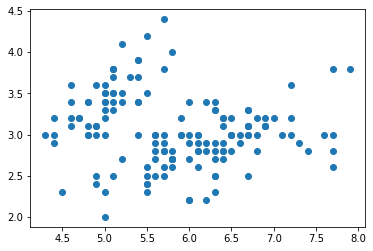

In [13]:
plt.scatter(df.sepal_length, df.sepal_width)

In [19]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['sepal_length', 'sepal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [20]:
k_range = range(1, 15)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal_length', 'sepal_width']])
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\envs\tensor_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


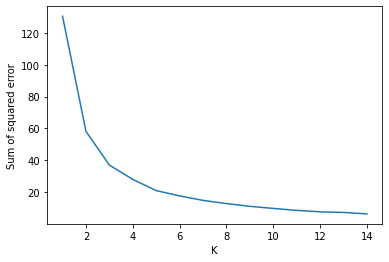

In [21]:
def plt_elbow(k_range, sse):
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.plot(k_range, sse)
    
plt_elbow(k_range, sse)

In [ ]:
def plot_cluster():
    df0 = df[df.cluster==0]
    df1 = df[df.cluster==1]
    df2 = df[df.cluster==2]

    plt.scatter(df0.Age, df0['Income($)'], color='green')
    plt.scatter(df1.Age, df1['Income($)'], color='red')
    plt.scatter(df2.Age, df2['Income($)'], color='black')

    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')

    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.legend()

### Hence K should be three because it's an elbow!

### Now trying out Scaling:

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal_length']])
df['sepal_length'] = scaler.transform(df[['sepal_length']])

scaler.fit(df[['sepal_width']])
df['sepal_width'] = scaler.transform(df[['sepal_width']])
df

,sepal_length,sepal_width
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


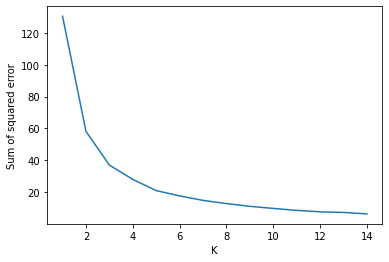

In [25]:
def plt_elbow(k_range, sse):
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.plot(k_range, sse)
    
plt_elbow(k_range, sse)